In [1]:
from pysces import *

In [2]:
x, L, n = symbols("x, L, n")

# Normalizing Particle in a Box

This can be done in one line, using the PIB() function, and the normalize_constant() function

For the PIB() function, there are three parameters:

    x: a variable.
    L: Length of the box.
    n: an integer.

This looks like:

PIB(x, L, n)

These variables do not change, unless given explicit values.

For the normalize_constant() function, there are four parameters:

    WaveFunc: The WaveFunction/expression of interest
    var: What the integral is taken with respect to
    lower: The lower bound of the integral. If bounds are not listed, this is -oo
    upper: The upper bound of the integral. If bounds are not listed, this is oo
    
This looks like:

normalize_constant(WaveFunc, var, lower, upper)

Since this is a Particle in a Box example, the lower bound is "0", and the upper bound is "L", the length of the box.


In [3]:
normalize_constant(PIB(x, L, n), x, 0, L)

⎧√2       π⋅n    
⎪──   for ─── ≠ 0
⎨√L        L     
⎪                
⎩zoo   otherwise 

The above is a piecewise function. The top expression is what we are interested in, and is the NORMALIZATION CONSTANT for the given WaveFunction.

The value can then be multiplied by the original WaveFunction to yield the normalized Particle in a Box.

In [4]:
(sqrt(2/L))*PIB(x, L, n)

# Expectation Value of the Position Operator for Particle in a Box

We can also do a simple positional expectation value using the normalized Particle in a Box.

The normalized Particle in a Box, although we were able to compute it, is given by the function PIB_normalize() with the same parameters as the PIB() function.

The expectation_value() function calculates the expectation value for an operator of interest. In this example we are using the "x", or positional, operator.

The expectation_value() function has SIX positional arguments:

    wavefunc_1: The "bra" normalized WaveFunction
    operator: The operator of interest
    wavefunc_2: The "ket" normalized WaveFunction
    var: What the integral is taken with respect to
    lower: The lower bound of the integral. If bounds are not listed, this is -oo
    upper: The upper bound of the integral. If bounds are not listed, this is oo

This looks like:

expectation_value(wavefunc_1, operator, wavefunc_2, var, lower, upper)

Since this is a Particle in a Box example, the lower bound is "0", and the upper bound is "L", the length of the box.




In [5]:
expectation_value(PIB_normalized(x, L, n), x, PIB_normalized(x, L, n), x, 0, L)

⎧L                            
⎪─  for n > -∞ ∧ n < ∞ ∧ n ≠ 0
⎨2                            
⎪                             
⎩0          otherwise         

The expectation value is the average value of an operator for a given WaveFunction between certain bounds. This quantity, L/2, for the positional operator, indicates the most likely location to find the particle in a 1-dimensional box at L/2, which is the center of the box.

# Expectation Value of the Kinetic Energy Operator for Particle in a Box

In [6]:
expectation_value(PIB_normalized(x, L, n), kinetic_energy(x), PIB_normalized(x, L, n), x, 0, L)

⎧ 2    2  2             
⎪π ⋅h_b ⋅n       π⋅n    
⎪──────────  for ─── ≠ 0
⎨     2           L     
⎪  2⋅L ⋅m               
⎪                       
⎩    0        otherwise 

# Graphing the WaveFunction of Particle in a Box

Again, we know that the PIB_normalized() function has the following parameters:

    x: a variable.
    L: Length of the box.
    n: an integer.

Let's take n = 1 , and L = 1

Note that L is the length of the box, and so it is easiest to observe when equal to 1

We can then use plot_function() , which has four arguments:

    func: The function/Normalized WaveFunction of interest
    B: This is "x" usually (x-axis)
    lower: The lower bound of the x-axis domain (for Particle in a Box, 0)
    upper: The upper bound of the x-axis domain (for Particle in a Box, 1)
    

This looks like:

plot_function(func, B, lower, upper)

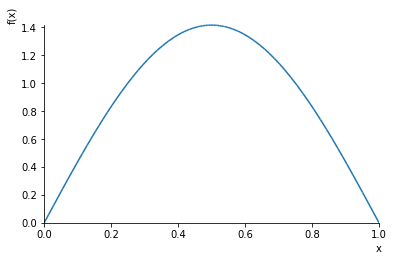

In [8]:
L = 1
n = 1

plot_function(PIB_normalized(x, 1, 1), x, 0, 1)

Note: The WaveFunction will not print if the n and L arguments are not assigned numerical values.

L should be kept at L = 1, but the n argument can change to any integer.

Sometimes, the plot is not graphed when the cell is run. It normally has to be run twice to have the correct output.